### Training the model without Date

#### Preprocessing

In [387]:
# Train and linear regression and random forest model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop rows with NaN values
df = df.dropna()

# Split the data into features and target variable
X = df.drop(columns=["Price"])
y = df["Price"]

# Export X, y, df to CSV files
X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)
df.to_csv("df.csv", index=False)

print(X.head())
print(y.head())
print(df.head())

  Year-Month  Avian Outbreaks  bacon price  potato price  soybean price  \
0    2022-02                8        7.097         0.802      15.885375   
1    2022-03               56        7.203         0.825      16.733152   
2    2022-04               68        7.422         0.849      16.798190   
3    2022-05               56        7.364         0.875      16.583690   
4    2022-06               14        7.403         0.891      16.876064   

   wheat price  corn price  egg_hols  Thanksgiving  Passover/Easter  gas price  
0       390.50    6.500600     False         False            False      3.611  
1       486.30    7.465652     False         False            False      4.322  
2       495.28    7.859310     False         False             True      4.213  
3       522.29    7.838690     False         False            False      4.545  
4       459.59    7.597964     False         False            False      5.032  
0    2.005
1    2.046
2    2.520
3    2.863
4    2.707
Name: Pr

#### Training

In [388]:
df_no_dates = df.drop(columns=["Year-Month"])
#Drop NaN values from df_no_dates
df_no_dates = df_no_dates.dropna()
df_no_dates.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_no_dates.drop(columns=["Price"]), df_no_dates["Price"], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Initialize the models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the models to the training data
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
# Make predictions on the test data
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
# Calculate the mean squared error and R-squared for both models
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
# Print the results
print("Linear Regression MSE:", mse_lin)
print("Random Forest MSE:", mse_rf)
print("Linear Regression R-squared:", r2_lin)
print("Random Forest R-squared:", r2_rf)

Linear Regression MSE: 0.763292029157144
Random Forest MSE: 0.5403656628857157
Linear Regression R-squared: -0.4694672459635487
Random Forest R-squared: -0.040295996973477965


### Perform cross validation for feature selection

Cross-Validation RMSE Scores: [1.41058407 1.2034316  1.07793683 0.41904403 1.42919693]
Mean Cross-Validation RMSE: 1.1080386936668307


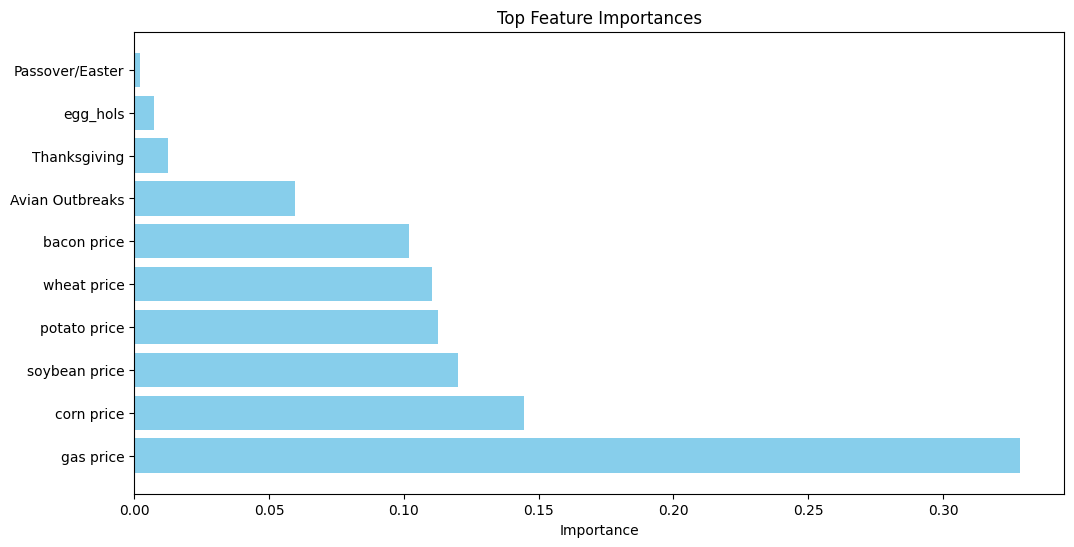

In [394]:
# Perform cross validation for feature selection
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and feature selection
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('model', RandomForestRegressor(random_state=42))
])

# X = X.drop(columns=["Year-Month"])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to RMSE
rmse_scores = (-cv_scores) ** 0.5
# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores:", rmse_scores)
# Print the mean RMSE score
print("Mean Cross-Validation RMSE:", rmse_scores.mean())
# Feature importance from Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head(10)
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.show()


#### Retrain the model with only the top 3, 4, 5 most correlated features

In [395]:
# Retrain the model with only the top 3 most important features: months_since_start, soybean price, and bacon price
X_top3 = df[['gas price', 'corn price', 'soybean price']]
y_top3 = df['Price']
# Split the data into training and testing sets
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y_top3, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top3 = LinearRegression()
lr_model_top3.fit(X_train_top3, y_train_top3)
# Train a Random Forest Regressor
rf_model_top3 = RandomForestRegressor(random_state=42)
rf_model_top3.fit(X_train_top3, y_train_top3)
# Evaluate the models
y_lr_top3 = lr_model_top3.predict(X_test_top3)
y_rf_top3 = rf_model_top3.predict(X_test_top3)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top3 = mean_squared_error(y_test_top3, y_lr_top3)
lr_r2_top3 = r2_score(y_test_top3, y_lr_top3)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top3 = mean_squared_error(y_test_top3, y_rf_top3)
rf_r2_top3 = r2_score(y_test_top3, y_rf_top3)
# Print the evaluation metrics for top 3 features
print("Top 3 Features - Linear Regression RMSE:", lr_rmse_top3)
print("Top 3 Features - Linear Regression R^2:", lr_r2_top3)
print("Top 3 Features - Random Forest RMSE:", rf_rmse_top3)
print("Top 3 Features - Random Forest R^2:", rf_r2_top3)

Top 3 Features - Linear Regression RMSE: 0.17743684059862144
Top 3 Features - Linear Regression R^2: 0.6584038408276767
Top 3 Features - Random Forest RMSE: 0.4601169830571443
Top 3 Features - Random Forest R^2: 0.11419638868672122


In [396]:
# Top 4 features
X_top4 = df[['gas price', 'corn price', 'soybean price', 'potato price']]
y_top4 = df['Price']
# Split the data into training and testing sets
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top4, y_top4, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top4 = LinearRegression()
lr_model_top4.fit(X_train_top4, y_train_top4)
# Train a Random Forest Regressor
rf_model_top4 = RandomForestRegressor(random_state=42)
rf_model_top4.fit(X_train_top4, y_train_top4)
# Evaluate the models
y_lr_top4 = lr_model_top4.predict(X_test_top4)
y_rf_top4 = rf_model_top4.predict(X_test_top4)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top4 = mean_squared_error(y_test_top4, y_lr_top4)
lr_r2_top4 = r2_score(y_test_top4, y_lr_top4)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top4 = mean_squared_error(y_test_top4, y_rf_top4)
rf_r2_top4 = r2_score(y_test_top4, y_rf_top4)
# Print the evaluation metrics for top 4 features
print("Top 4 Features - Linear Regression RMSE:", lr_rmse_top4)
print("Top 4 Features - Linear Regression R^2:", lr_r2_top4)
print("Top 4 Features - Random Forest RMSE:", rf_rmse_top4)
print("Top 4 Features - Random Forest R^2:", rf_r2_top4)

Top 4 Features - Linear Regression RMSE: 0.35203415128743654
Top 4 Features - Linear Regression R^2: 0.3222742606801622
Top 4 Features - Random Forest RMSE: 0.37648148212857213
Top 4 Features - Random Forest R^2: 0.2752089821891075


In [397]:
# Train with top 5 features
X_top5 = df[['gas price', 'corn price', 'soybean price', 'potato price', 'wheat price']]
y_top5 = df['Price']
# Split the data into training and testing sets
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y_top5, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top5 = LinearRegression()
lr_model_top5.fit(X_train_top5, y_train_top5)
# Train a Random Forest Regressor
rf_model_top5 = RandomForestRegressor(random_state=42)
rf_model_top5.fit(X_train_top5, y_train_top5)
# Evaluate the models
y_lr_top5 = lr_model_top5.predict(X_test_top5)
y_rf_top5 = rf_model_top5.predict(X_test_top5)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top5 = mean_squared_error(y_test_top5, y_lr_top5)
lr_r2_top5 = r2_score(y_test_top5, y_lr_top5)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top5 = mean_squared_error(y_test_top5, y_rf_top5)
rf_r2_top5 = r2_score(y_test_top5, y_rf_top5)
# Print the evaluation metrics for top 5 features
print("Top 5 Features - Linear Regression RMSE:", lr_rmse_top5)
print("Top 5 Features - Linear Regression R^2:", lr_r2_top5)
print("Top 5 Features - Random Forest RMSE:", rf_rmse_top5)
print("Top 5 Features - Random Forest R^2:", rf_r2_top5)

Top 5 Features - Linear Regression RMSE: 0.25900333407069687
Top 5 Features - Linear Regression R^2: 0.5013744393053424
Top 5 Features - Random Forest RMSE: 0.35380453855714394
Top 5 Features - Random Forest R^2: 0.3188659634542911


### Retrain with date

In [399]:
# Train a linear regression model and random forest model with all features
X_all = df.drop(columns=["Price"])
X_all["Year-Month"] = X_all["Year-Month"].astype(str)  # Convert Year-Month to string for one-hot encoding
# One hot enode categorical variables
X_all = pd.get_dummies(X_all, drop_first=True)
# Reset index after dropping rows
X_all.reset_index(drop=True, inplace=True)
y_all = df["Price"]
# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_all = LinearRegression()
lr_model_all.fit(X_train_all, y_train_all)
# Train a Random Forest Regressor
rf_model_all = RandomForestRegressor(random_state=42)
rf_model_all.fit(X_train_all, y_train_all)
# Evaluate the models
y_lr_all = lr_model_all.predict(X_test_all)
y_rf_all = rf_model_all.predict(X_test_all)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_all = mean_squared_error(y_test_all, y_lr_all)
lr_r2_all = r2_score(y_test_all, y_lr_all)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_all = mean_squared_error(y_test_all, y_rf_all)
rf_r2_all = r2_score(y_test_all, y_rf_all)
# Print the evaluation metrics for all features
print("All Features - Linear Regression RMSE:", lr_rmse_all)
print("All Features - Linear Regression R^2:", lr_r2_all)
print("All Features - Random Forest RMSE:", rf_rmse_all)
print("All Features - Random Forest R^2:", rf_r2_all)


All Features - Linear Regression RMSE: 0.3502902081446485
All Features - Linear Regression R^2: 0.32563164845477255
All Features - Random Forest RMSE: 0.5670498357142868
All Features - Random Forest R^2: -0.0916675775211151


#### Train with top 3-4 features

In [401]:
# Train with top 3 features
X_top3 = X_all[['gas price', 'corn price', 'soybean price']]
y_top3 = df['Price']
# Split the data into training and testing sets
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y_top3, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top3 = LinearRegression()
lr_model_top3.fit(X_train_top3, y_train_top3)
# Train a Random Forest Regressor
rf_model_top3 = RandomForestRegressor(random_state=42)
rf_model_top3.fit(X_train_top3, y_train_top3)
# Evaluate the models
y_lr_top3 = lr_model_top3.predict(X_test_top3)
y_rf_top3 = rf_model_top3.predict(X_test_top3)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top3 = mean_squared_error(y_test_top3, y_lr_top3)
lr_r2_top3 = r2_score(y_test_top3, y_lr_top3)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top3 = mean_squared_error(y_test_top3, y_rf_top3)
rf_r2_top3 = r2_score(y_test_top3, y_rf_top3)
# Print the evaluation metrics for top 3 features
print("Top 3 Features - Linear Regression RMSE:", lr_rmse_top3)
print("Top 3 Features - Linear Regression R^2:", lr_r2_top3)
print("Top 3 Features - Random Forest RMSE:", rf_rmse_top3)
print("Top 3 Features - Random Forest R^2:", rf_r2_top3)

Top 3 Features - Linear Regression RMSE: 0.17743684059862144
Top 3 Features - Linear Regression R^2: 0.6584038408276767
Top 3 Features - Random Forest RMSE: 0.4601169830571443
Top 3 Features - Random Forest R^2: 0.11419638868672122


In [406]:
# Train with top 4 features and one hot encoded year-month
X_top4 = X_all.drop(columns=["Avian Outbreaks", "egg_hols", "Thanksgiving", "Passover/Easter"])
y_top4 = df['Price']
# Split the data into training and testing sets
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top4, y_top4, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top4 = LinearRegression()
lr_model_top4.fit(X_train_top4, y_train_top4)
# Train a Random Forest Regressor
rf_model_top4 = RandomForestRegressor(random_state=42)
rf_model_top4.fit(X_train_top4, y_train_top4)
# Evaluate the models
y_lr_top4 = lr_model_top4.predict(X_test_top4)
y_rf_top4 = rf_model_top4.predict(X_test_top4)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top4 = mean_squared_error(y_test_top4, y_lr_top4)
lr_r2_top4 = r2_score(y_test_top4, y_lr_top4)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top4 = mean_squared_error(y_test_top4, y_rf_top4)
rf_r2_top4 = r2_score(y_test_top4, y_rf_top4)
# Print the evaluation metrics for top 4 features
print("Top 4 Features - Linear Regression RMSE:", lr_rmse_top4)
print("Top 4 Features - Linear Regression R^2:", lr_r2_top4)
print("Top 4 Features - Random Forest RMSE:", rf_rmse_top4)
print("Top 4 Features - Random Forest R^2:", rf_r2_top4)


Top 4 Features - Linear Regression RMSE: 0.2208052147746111
Top 4 Features - Linear Regression R^2: 0.5749123291546417
Top 4 Features - Random Forest RMSE: 0.5475526948142873
Top 4 Features - Random Forest R^2: -0.05413225834043067


### CART model

In [28]:
#create a cart model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

In [31]:
rmse = mean_squared_error(y_test, y_pred_tree)
print("RMSE of Decision Tree Regressor:", rmse)

RMSE of Decision Tree Regressor: 0.5096510000000001


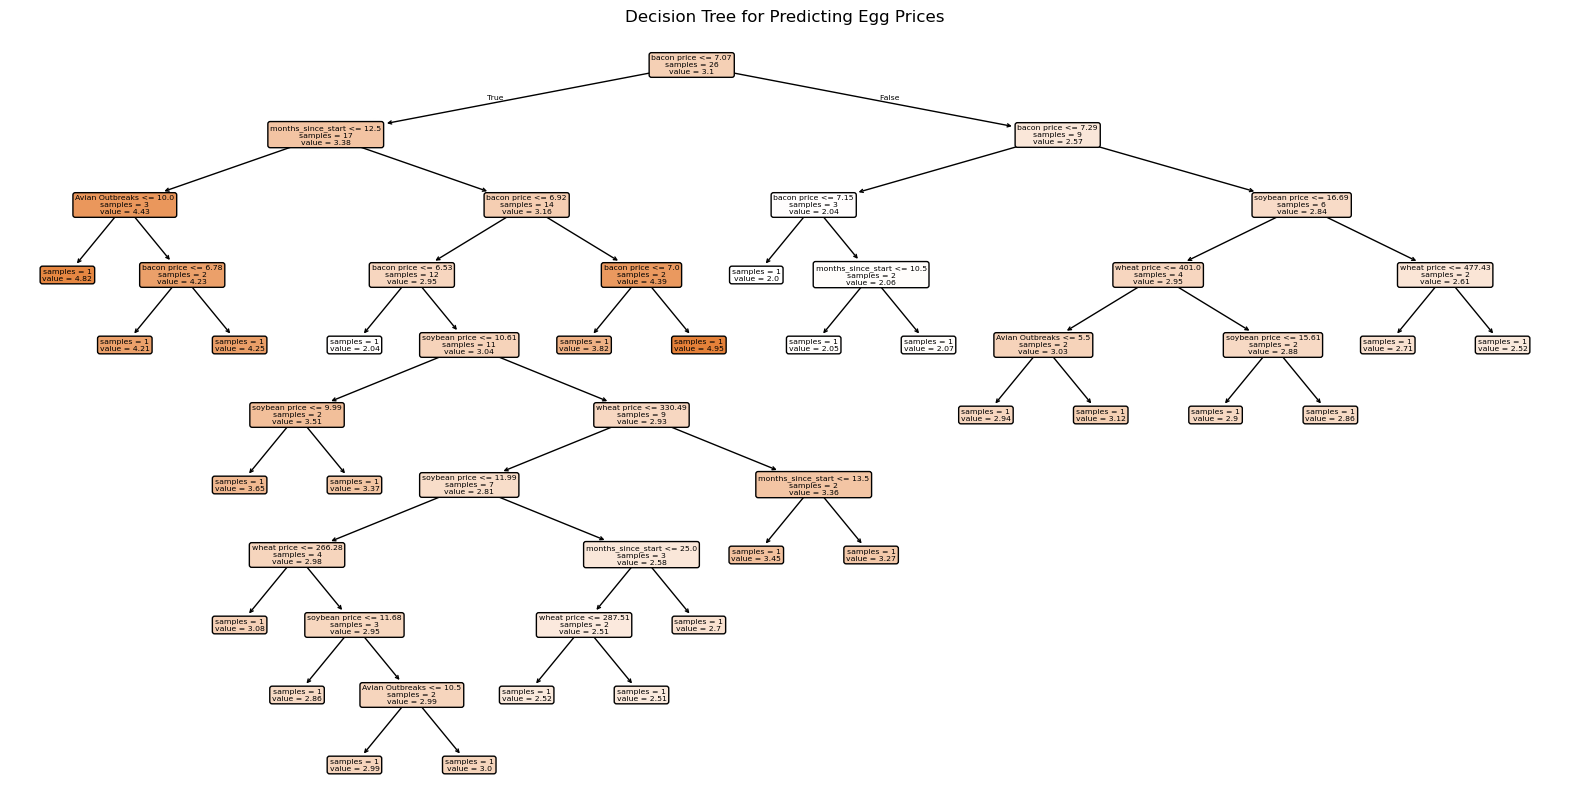

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded = True, impurity = False, proportion = False, precision = 2)
plt.title('Decision Tree for Predicting Egg Prices')    
plt.show()